In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# -1 ~ 1 0.2 간격의 10개의 리스트
x=np.arange(-1.0, 1.0, 0.2)
y=np.arange(-1.0, 1.0, 0.2)
# 출력을 저장하는 10X10 그리드
z=np.zeros((10,10))
# 가중치
w_im=np.array([[4.0,4.0],[4.0,4.0]]) #hidden layer에 사용할 가중치 행렬
w_mo=np.array([[1.0],[-1.0]]) #output layer에 사용할 가중치 행렬# 편향
b_im=np.array([3.0,-3.0]) # input->은닉층
b_mo=np.array([0.1]) # 은닉층->출력층
# 은닉층
def hidden_layer(x, w, b):
    u=np.dot(x, w) + b # 행렬곱셈
    return 1/(1+np.exp(-u)) # 활성화함수(시그모이드 함수) 0.0~1.0

[[0.10667615 0.11473686 0.13221275 0.16895435 0.2414415  0.36803037
  0.54814068 0.74116003 0.89223209 0.97836824]
 [0.11473686 0.13221275 0.16895435 0.2414415  0.36803037 0.54814068
  0.74116003 0.89223209 0.97836824 1.00514825]]


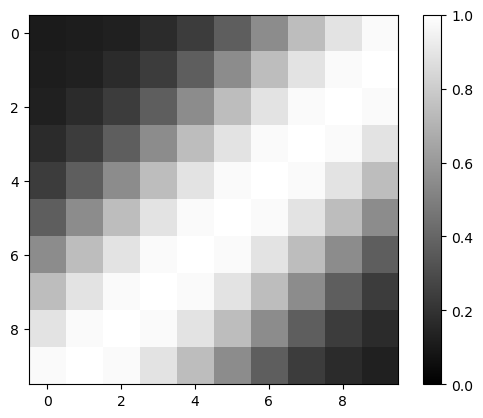

In [2]:
# 출력층
def output_layer(x, w, b):
   u = np.dot(x, w) + b
   return u # 활성화함수(항등함수)
# 그리드맵의 각 그리드별 신경망 연산
for i in range(10):
   for j in range(10):
     # 순전파
     inp=np.array([x[i], y[j]]) # 입력층
     hid=hidden_layer(inp, w_im, b_im) # 은닉층
     out=output_layer(hid, w_mo, b_mo) # 출력층

     # 그리드맵에 신경망 출력 값 저장
     z[j][i] = out[0]

print(z[:2])
# 그리드맵으로 표시
plt.imshow(z, "gray", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

인위적으로 만든 나이와 키 데이터로 나이와 키의 상관관계를 분석하는 회귀분석 실습

In [3]:
import numpy as np
# 데이터 생성
np.random.seed(seed=1) # 난수 고정
X_min=4 # X의 하한
X_max=30 # X의 상한
X_n=16
# 랜덤으로 만든 나이 데이터
X=5+25*np.random.rand(X_n)
Prm_c=[170, 108, 0.2] # 생성 매개 변수
# 랜덤으로 만든 신장 데이터
T=Prm_c[0]-Prm_c[1]*np.exp(-Prm_c[2]*X)+4*np.random.randn(X_n) 

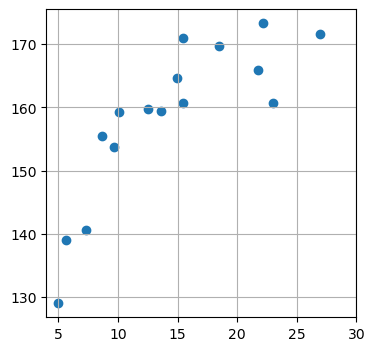

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.scatter(X, T, marker='o')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# 평균제곱오차 함수
# x 나이, t 키, w 기울기와 편차
def mse(x, t, w):
 # 예측값: x에 기울기를 곱하고 편차를 더한 값
 y=w[0]*x+w[1]
 return np.mean((y-t)**2)

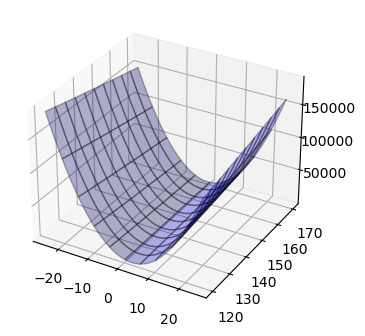

In [6]:
xn=100 # 등고선 표시 해상도
w0_range=[-25, 25]
w1_range=[120, 170]
x0=np.linspace(w0_range[0], w0_range[1], xn)
x1=np.linspace(w1_range[0], w1_range[1], xn)
# 직사각형 격자를 만들고
xx0, xx1=np.meshgrid(x0, x1)
J=np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        #평균제곱오차를 계산하여 리스트에 저장
        J[i1, i0]=mse(X, T, (x0[i0], x1[i1]))
        
plt.figure(figsize=(9, 4))

#3d 차트
ax=plt.subplot(1, 2, 1, projection='3d') #1행 2열 중 첫번째 서브플롯
# rstride : row stride 행방향 이동, cstride : column stride 열방향 이동
# 곡면플롯
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3,color='blue', edgecolor='black')

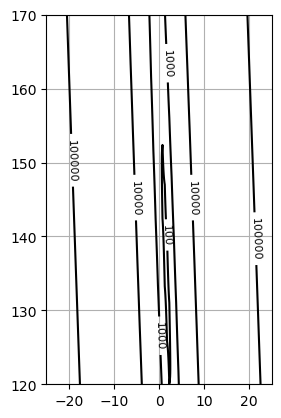

예측: [159.89837782 171.70878832 143.6642537  155.43244258 149.37438324
 147.25540754 150.91265694 157.11572006 159.10967899 164.64098892
 159.982974   170.3418217  151.62104361 177.8531475  144.72625588
 169.76738836]
실제: [170.91013145 160.67559882 129.00206616 159.70139552 155.46058905
 140.56134369 153.65466385 159.42939554 164.70423898 169.64527574
 160.71257522 173.28709855 159.31193249 171.51757345 138.9570433
 165.8744074 ]


In [7]:
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)
plt.subplot(1, 2, 2) #1행 2열 중 두번째 서브플롯

#등고선
cont=plt.contour(xx0, xx1, J, 30, colors='black',
                 levels=[100, 1000, 10000, 100000])

#등고선 플롯의 고도각(Elevation)에 레이블 지정
cont.clabel(fmt='%d', fontsize=8)
plt.grid(True)
plt.show()

# 왼쪽 그래프 : 평균 제곱 오차는 계곡 모양, 기울기의 변화에 따라 평균제곱오차가 크게 바뀜
# 오른쪽 그래프 : 기울기의 변화에 따라 등고선의 간격으로 오차를 확인할 수 있음, 계곡의 최저점은 135 근처

from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X.reshape(-1,1), T) #-1: 샘플 수 무관

print("예측:", lin_reg.predict(X.reshape(-1,1)))
print('실제:', T)

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

pred=lin_reg.predict(X.reshape(-1,1))
#평균제곱오차
lin_mse=mean_squared_error(T, pred)
print(lin_mse)
#평균제곱근오차
lin_rmse=np.sqrt(lin_mse)
print(lin_rmse)
#평균절대오차
lin_mae=mean_absolute_error(T, pred)
print(lin_mae)

49.01219534293871
7.000871041730358
6.04840106086346


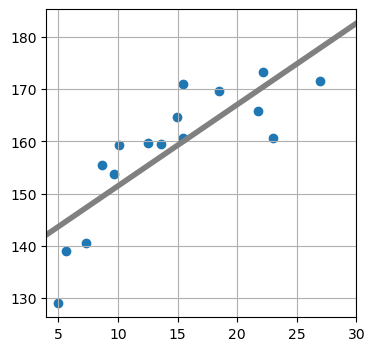

In [9]:
from scipy import stats
slope,intercept,r_value,p_value,stderr=stats.linregress(X, T)
slope,intercept,r_value,p_value,stderr
# 회귀선 표시
def show_line(w):
   xb=np.linspace(X_min, X_max, 100)
   y=w[0]*xb+w[1]
   plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)

plt.figure(figsize=(4, 4))
W=np.array([slope, intercept])
show_line(W)
plt.scatter(X, T, marker='o')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

In [10]:
#독립변수가 1개 아닌 2개 이상인 경우(다중회귀분석)
#독립변수: 나이, 체중
#종속변수: 키
X0=X
X0_min=5
X0_max=30
np.random.seed(seed=1) # 난수를 고정
#랜덤으로 만든 몸무게 데이터
X1=23*(T/100)**2+2*np.random.randn(X_n)
X1_min=40
X1_max=75

In [11]:
print(np.round(X0, 2)) #나이
print(np.round(X1, 2)) #체중
print(np.round(T, 2)) #키

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


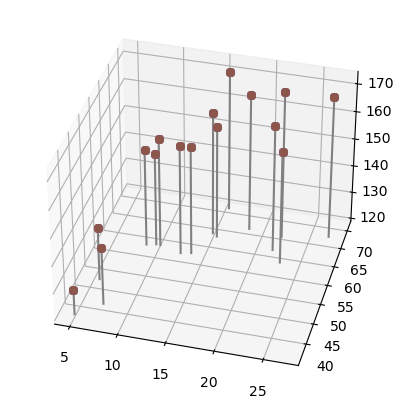

In [12]:
#나이,체중,키 3차원 그래프
def show_data2(ax, x0, x1, t):
   for i in range(len(x0)):
     ax.plot([x0[i], x0[i]], [x1[i], x1[i]],
             [120, t[i]], color='gray')
     ax.plot(x0, x1, t, 'o',
             markersize=6, markeredgewidth=0.5)
     ax.view_init(elev=35, azim=-75)

plt.figure(figsize=(6, 5))
ax=plt.subplot(1,1,1,projection='3d')
show_data2(ax, X0, X1, T)
plt.show()

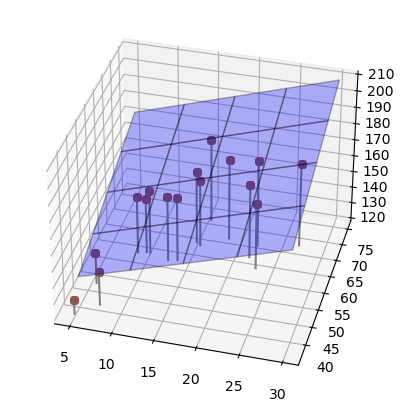

mse: 165.78895635193032


In [13]:
#면의 표시
def show_plane(ax, w):
  px0=np.linspace(X0_min, X0_max, 5)
  px1=np.linspace(X1_min, X1_max, 5)
  px0, px1 = np.meshgrid(px0, px1)
  y=w[0]*px0+w[1]*px1+w[2]
  ax.plot_surface(px0, px1, y, rstride=1, cstride=1,
                  alpha=0.3,color='blue', edgecolor='black')
#면의 MSE
def mse_plane(x0, x1, t, w):
  y=w[0]*x0+w[1]*x1+w[2]
  mse=np.mean((y-t)**2)
  return mse

plt.figure(figsize=(6, 5))
ax=plt.subplot(1, 1, 1, projection='3d')
W=[1.5, 1, 90]
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse=mse_plane(X0, X1, T, W)
plt.show()

print('mse:',mse) # 165.7

In [14]:
lin_reg=LinearRegression()
lin_reg.fit(list(zip(X0,X1)), T)
pred=lin_reg.predict(list(zip(X0,X1)))
#평균제곱오차
lin_mse = mean_squared_error(T, pred)
print(lin_mse)
#평균제곱근오차
lin_rmse=np.sqrt(lin_mse)
print(lin_rmse)
#평균절대오차
lin_mae=mean_absolute_error(T, pred)
print(lin_mae)

6.479952760451312
2.545575133530989
2.2600456889986766


독립변수가 1개 아닌 2개 이상인 경우(다중회귀분석)

In [15]:
# 독립변수: 나이, 체중
# 종속변수: 키
X0=X
X0_min=5
X0_max=30
np.random.seed(seed=1) # 난수를 고정

#랜덤으로 만든 몸무게 데이터
X1=23*(T/100)**2+2*np.random.randn(X_n)
X1_min=40
X1_max=75

print(np.round(X0, 2)) #나이
print(np.round(X1, 2)) #체중
print(np.round(T, 2)) #키

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


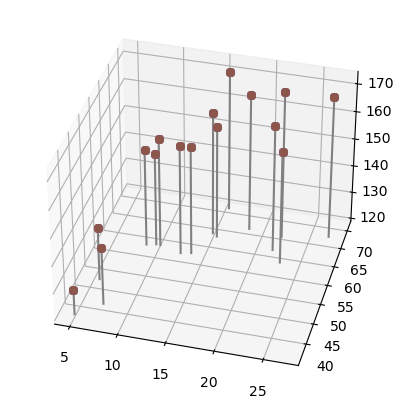

In [16]:
#나이,체중,키 3차원 그래프
def show_data2(ax, x0, x1, t):
   for i in range(len(x0)):
     ax.plot([x0[i], x0[i]], [x1[i], x1[i]],[120, t[i]], color='gray')
     ax.plot(x0, x1, t, 'o', markersize=6, markeredgewidth=0.5)
     ax.view_init(elev=35, azim=-75)

plt.figure(figsize=(6, 5))
ax=plt.subplot(1,1,1,projection='3d')
show_data2(ax, X0, X1, T)
plt.show()

In [17]:
#면의 표시
def show_plane(ax, w):
   px0=np.linspace(X0_min, X0_max, 5)
   px1=np.linspace(X1_min, X1_max, 5)
   px0, px1=np.meshgrid(px0, px1)
   y=w[0]*px0+w[1]*px1+w[2]
   ax.plot_surface(px0, px1, y, rstride=1, cstride=1,
                   alpha=0.3,color='blue', edgecolor='black') 

In [18]:
#면의 MSE
def mse_plane(x0, x1, t, w):
   y=w[0]*x0+w[1]*x1+w[2]
   mse=np.mean((y-t)**2)
   return mse

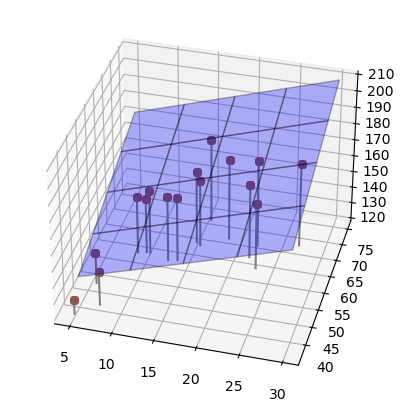

mse: 165.78895635193032


In [19]:
plt.figure(figsize=(6, 5))
ax=plt.subplot(1, 1, 1, projection='3d')
W=[1.5, 1, 90]
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse=mse_plane(X0, X1, T, W)
plt.show()
print('mse:',mse) # 165.7

In [20]:
lin_reg=LinearRegression()
lin_reg.fit(list(zip(X0,X1)), T)
pred=lin_reg.predict(list(zip(X0,X1)))

#평균제곱오차
lin_mse=mean_squared_error(T, pred)
print(lin_mse)

#평균제곱근오차
lin_rmse=np.sqrt(lin_mse)
print(lin_rmse)

#평균절대오차
lin_mae=mean_absolute_error(T, pred)
print(lin_mae)

6.479952760451312
2.545575133530989
2.2600456889986766
